In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [2]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv("D:/Project/Sentiment_Analysis/Dataset/Raw/training.1600000.processed.noemoticon (sentiment140).csv", names=column_names, encoding="latin-1")

In [4]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.shape

(1600000, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [7]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [8]:
df['target'] = df['target'].replace({0: 'negative', 4: 'positive'})

In [9]:
df['target'].value_counts()


target
negative    800000
positive    800000
Name: count, dtype: int64

In [10]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load Sentiment140 dataset
df = pd.read_csv("D:/Project/Sentiment_Analysis/Dataset/Raw/training.1600000.processed.noemoticon (sentiment140).csv", encoding='latin-1', usecols=[0, 5], names=["label", "text"])

# Convert labels (0=negative, 4=positive)
df['label'] = df['label'].replace(4, 2)  # Make 4 → 2 (positive)

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to classify neutral tweets
def classify_neutral(text):
    score = analyzer.polarity_scores(text)['compound']
    if -0.25 <= score <= 0.25:  # Adjust threshold as needed
        return 1  # Neutral
    return None  # Keep original label

# Apply function
df['neutral_label'] = df['text'].apply(classify_neutral)

# Fill in neutral class where applicable
df['label'] = df['neutral_label'].combine_first(df['label'])

# Remove extra column
df.drop(columns=['neutral_label'], inplace=True)

# Check new class distribution
print(df['label'].value_counts())

label
1.0    589953
2.0    527434
0.0    482613
Name: count, dtype: int64


In [12]:
df.head()

,label,text
0,1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0.0,is upset that he can't update his Facebook by ...
2,0.0,@Kenichan I dived many times for the ball. Man...
3,1.0,my whole body feels itchy and like its on fire
4,0.0,"@nationwideclass no, it's not behaving at all...."


In [13]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [14]:
# for ML model
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = content.lower()
    stemmed_content = re.sub('[^a-zA-Z]',' ', stemmed_content)
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(x) for x in stemmed_content if x not in stop_words]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content
    

In [15]:
df['stemmed_content'] = df["text"].apply(stemming)

In [16]:
df.head()

,label,text,stemmed_content
0,1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0.0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0.0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,1.0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0.0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [17]:
df.isnull().sum() 

label              0
text               0
stemmed_content    0
dtype: int64

In [18]:
df.head()

,label,text,stemmed_content
0,1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0.0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0.0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,1.0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0.0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [20]:
df.isnull().sum()

label              0
text               0
stemmed_content    0
dtype: int64

In [21]:
df['label'].value_counts()

label
1.0    589953
2.0    527434
0.0    482613
Name: count, dtype: int64

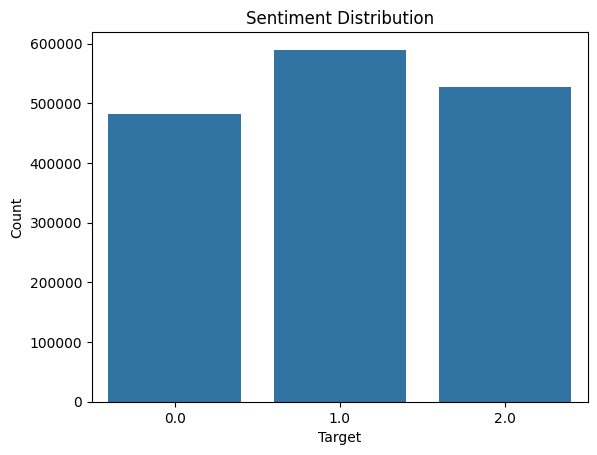

In [22]:
# Distribution of Target variable
sns.countplot(x=df['label'])
plt.title("Sentiment Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


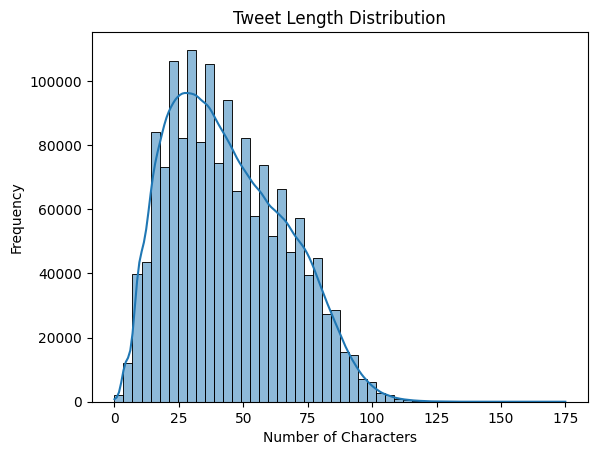

In [23]:
df['text_length'] = df['stemmed_content'].apply(len)

sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()



In [53]:
df.columns

Index(['label', 'text', 'stemmed_content', 'text_length'], dtype='object')

In [24]:
# most frequent words in each category

from wordcloud import WordCloud

def create_wordcloud(sentiment):
    text = " ".join(df[df["label"] == sentiment]['stemmed_content'])
    wordcloud = WordCloud(width=800, height=400, background_color='White').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word CLoud for Sentiment {sentiment}")
    plt.show()
    

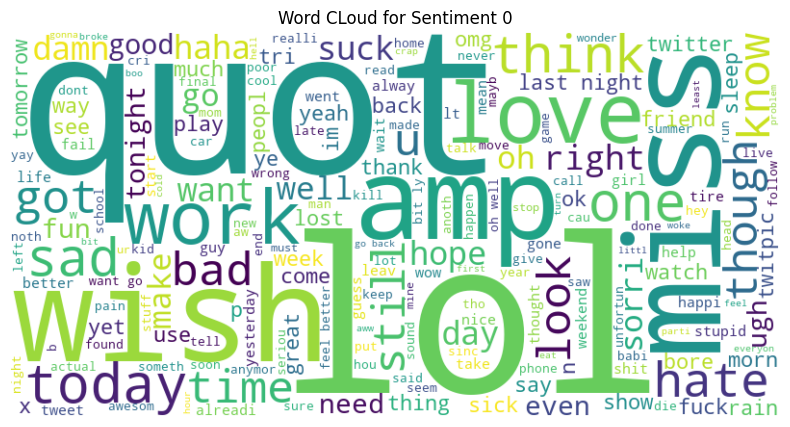

In [25]:
create_wordcloud(0)

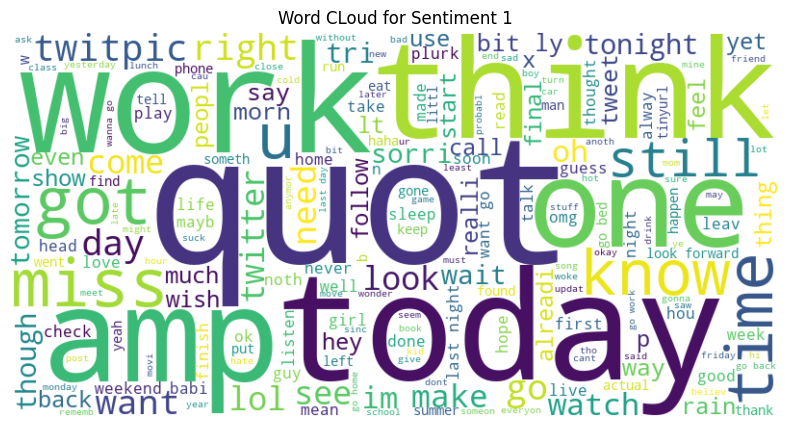

In [26]:
create_wordcloud(1)

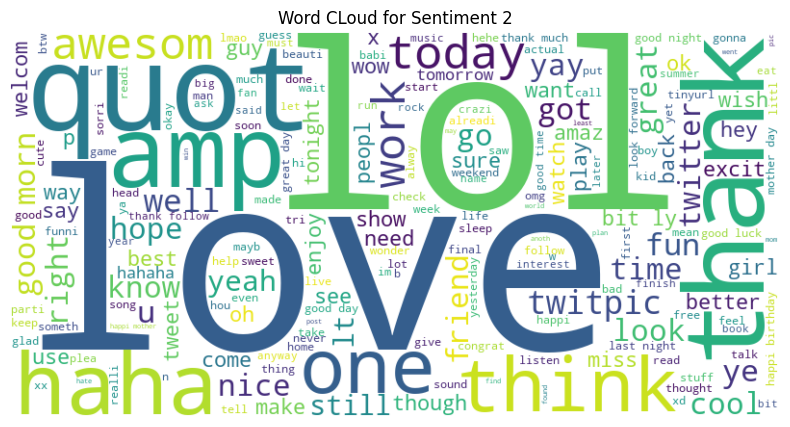

In [27]:
create_wordcloud(2)

In [28]:
# get most common words (without Stopwords)

from collections import Counter

df['clean_text'] = df['stemmed_content'].apply(lambda x:' '.join([x for x in x.lower().split() if x not in stop_words and x not in string.punctuation]))
word_counts = Counter(" ".join(df["clean_text"]).split())
common_words = word_counts.most_common(20)
print(common_words)

[('go', 138805), ('get', 110870), ('day', 109411), ('good', 92597), ('work', 87890), ('like', 83850), ('love', 83073), ('quot', 73415), ('http', 71650), ('today', 68718), ('time', 66421), ('got', 61826), ('lol', 59488), ('thank', 59446), ('u', 57937), ('miss', 57678), ('one', 57614), ('back', 57420), ('want', 57351), ('know', 54970)]


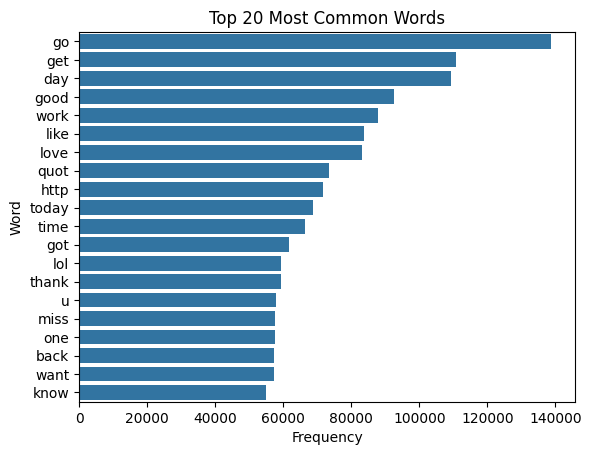

In [29]:
 # Ploting common words

common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

sns.barplot(y=common_words_df['Word'], x=common_words_df['Frequency'])
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()



In [30]:
# Hastag & Mentions

df['hastags'] = df['text'].apply(lambda x: re.findall(r'#\w+', x))
df['mentions'] = df['text'].apply(lambda x: re.findall(r'@\w+', x))

hastags = Counter([tag for tags in df['hastags'] for tag in tags])
mentions = Counter([tag for tags in df["mentions"] for tag in tags])

print(hastags.most_common(20))
print(mentions.most_common(20))

[('#followfriday', 2114), ('#fb', 1747), ('#squarespace', 888), ('#FF', 586), ('#1', 519), ('#seb', 499), ('#FollowFriday', 463), ('#musicmonday', 405), ('#ff', 399), ('#iranelection', 359), ('#2', 341), ('#fail', 301), ('#BSB', 299), ('#myweakness', 269), ('#iremember', 268), ('#asot400', 264), ('#marsiscoming', 248), ('#mcflyforgermany', 230), ('#andyhurleyday', 188), ('#iPhone', 185)]
[('@mileycyrus', 4500), ('@tommcfly', 3887), ('@ddlovato', 3467), ('@DavidArchie', 1299), ('@Jonasbrothers', 1287), ('@jordanknight', 1130), ('@DonnieWahlberg', 1104), ('@mitchelmusso', 1077), ('@JonathanRKnight', 1074), ('@taylorswift13', 1011), ('@jonasbrothers', 986), ('@selenagomez', 801), ('@dougiemcfly', 794), ('@peterfacinelli', 637), ('@aplusk', 624), ('@joeymcintyre', 578), ('@Dannymcfly', 546), ('@gfalcone601', 540), ('@shaundiviney', 511), ('@YoungQ', 507)]


In [31]:
import math
from collections import Counter

# Extract words for each sentiment class
positive_words = [word.lower() for text in df[df['label'] == 2]['stemmed_content'] for word in text.split()]
negative_words = [word.lower() for text in df[df['label'] == 0]['stemmed_content'] for word in text.split()]
neutral_words = [word.lower() for text in df[df['label'] == 1]['stemmed_content'] for word in text.split()]

# Compute word frequencies
positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)
neutral_counts = Counter(neutral_words)

# Create vocabulary (including neutral words if needed)
vocabulary = set(positive_counts.keys()).union(set(negative_counts.keys()), set(neutral_counts.keys()))

# Compute log-odds ratios
smoothing = 1
log_ratios = {}

for word in vocabulary:
    pos_count = positive_counts.get(word, 0) + smoothing
    neg_count = negative_counts.get(word, 0) + smoothing
    ratio = pos_count / neg_count
    log_ratio = math.log(ratio) if neg_count > 0 else float('inf')  # Avoid log(0)
    log_ratios[word] = log_ratio

# Sort and display top 10 discriminative words
sorted_log_ratios = sorted(log_ratios.items(), key=lambda x: abs(x[1]), reverse=True)

print("Top 10 discriminative words (word: log_ratio):")
for word, lr in sorted_log_ratios[:10]:
    print(f"{word}: {lr:.2f}")


Top 10 discriminative words (word: log_ratio):
tweeterfollow: 6.48
tweeteradd: 6.03
isplay: -5.35
fawcett: -5.02
banksyart: 4.79
lvbu: -4.47
iamsoannoy: 4.44
inaperfectworld: -4.37
neda: -4.30
dontyouh: -4.08


In [32]:
df.head()

,label,text,stemmed_content,text_length,clean_text,hastags,mentions
0,1.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...,75,switchfoot http twitpic com zl awww bummer sho...,[],[@switchfoot]
1,0.0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...,65,upset updat facebook text might cri result sch...,[],[]
2,0.0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...,53,kenichan dive mani time ball manag save rest g...,[],[@Kenichan]
3,1.0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire,31,whole bodi feel itchi like fire,[],[]
4,0.0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see,29,nationwideclass behav mad see,[],[@nationwideclass]


In [33]:
Y = df['label'].values
X = df['stemmed_content'].values

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=42)

In [35]:
print(X_train)

['scottwalk good score brian william time hearst argyl send wesh team white hous'
 'saw movi incred ador' 'xchichan seem mean end brother ador' ... 'juli'
 'bet thing go fine gutta chang blogskin'
 'googl stuff upload new pic mspace']


In [36]:
print(X_test)

['goth chick reason get sun sunburnt'
 'feel beaten amp exhaust hope feel better theatresport comp tonight'
 'srri bbi sister found batman game purs' ...
 'wish knew titan tonight miss'
 'think may actual still drunk ace space tast go away fack'
 'blowhornoz think stay late anymor']


In [37]:
print(Y_train)

[2. 2. 0. ... 1. 2. 1.]


In [38]:
# Converting text data to numerical data

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [39]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8271724 stored elements and shape (1120000, 422673)>
  Coords	Values
  (0, 326575)	0.417132867331509
  (0, 137991)	0.1140987338926034
  (0, 326252)	0.2429975476769149
  (0, 47222)	0.26137374767965893
  (0, 405365)	0.2680566225877859
  (0, 374577)	0.12366889375639051
  (0, 148270)	0.39028380691071257
  (0, 20771)	0.36228550503131784
  (0, 328889)	0.18920421592039458
  (0, 402354)	0.3968223371864604
  (0, 363855)	0.2131258977815304
  (0, 403791)	0.2175020917734263
  (0, 155903)	0.1700029694770151
  (1, 324588)	0.4303118326654855
  (1, 252115)	0.3956700761558878
  (1, 164168)	0.5895478568922494
  (1, 4121)	0.5574138874630061
  (2, 4121)	0.38667945452460045
  (2, 410855)	0.6968129617583978
  (2, 328219)	0.3032546453974576
  (2, 236515)	0.28953521709710595
  (2, 109855)	0.2929527495748392
  (2, 49119)	0.32142706854896774
  (3, 146951)	0.6506043947012732
  (3, 182241)	0.7594168299395202
  :	:
  (1119994, 194924)	0.2533819730231202

In [40]:
print(X_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3426499 stored elements and shape (480000, 422673)>
  Coords	Values
  (0, 63897)	0.42889301822781806
  (0, 133592)	0.1910407410689899
  (0, 138928)	0.5805744587576018
  (0, 306764)	0.35777204219552566
  (0, 355840)	0.31114711227594577
  (0, 355879)	0.46655562621314983
  (1, 13767)	0.18603844384878504
  (1, 32671)	0.41478309266959584
  (1, 36564)	0.21169524160628253
  (1, 72477)	0.341941928996564
  (1, 115145)	0.3087926744600346
  (1, 119160)	0.3602552925256105
  (1, 155085)	0.1850404150379809
  (1, 367558)	0.5741410759430609
  (1, 378007)	0.20637539447753075
  (2, 31238)	0.4426815759862735
  (2, 31769)	0.433321070063026
  (2, 125189)	0.27809449995548985
  (2, 130450)	0.26411987996047737
  (2, 299144)	0.4226434749271027
  (2, 338416)	0.3006491643644298
  (2, 348450)	0.44738415673157883
  (3, 39276)	0.2411277687510412
  (3, 79287)	0.5747606329774168
  (3, 138405)	0.4154720987640517
  :	:
  (479995, 336136)	0.25546374552021917


ML model training

Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500) 

In [42]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [43]:
ytrain_pred = model.predict(X_train)

In [44]:
ytest_pred = model.predict(X_test)

In [45]:
from sklearn import metrics

In [46]:
metrics.confusion_matrix(Y_train, ytrain_pred)

array([[222029,  58455,  57345],
       [ 46127, 342679,  24161],
       [ 34713,  38644, 295847]])

In [47]:
metrics.confusion_matrix(Y_test, ytest_pred)

array([[ 87828,  28413,  28543],
       [ 22460, 142367,  12159],
       [ 18988,  18464, 120778]])

In [48]:
print(metrics.classification_report(Y_train, ytrain_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.66      0.69    337829
         1.0       0.78      0.83      0.80    412967
         2.0       0.78      0.80      0.79    369204

    accuracy                           0.77   1120000
   macro avg       0.77      0.76      0.76   1120000
weighted avg       0.77      0.77      0.77   1120000



In [49]:
print(metrics.classification_report(Y_test, ytest_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.61      0.64    144784
         1.0       0.75      0.80      0.78    176986
         2.0       0.75      0.76      0.76    158230

    accuracy                           0.73    480000
   macro avg       0.73      0.72      0.72    480000
weighted avg       0.73      0.73      0.73    480000



In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    "penalty" : ['l1', 'l2'],
    'solver' : ['liblinear']    
}

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=6)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=6,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=2)

In [51]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_estimator_)

Best Parameters: LogisticRegression(C=1, max_iter=500, penalty='l1', solver='liblinear')


In [52]:
best_model.fit(X_train, Y_train)

LogisticRegression(C=1, max_iter=500, penalty='l1', solver='liblinear')

In [53]:
ytrain_pred = best_model.predict(X_train)
ytest_pred = best_model.predict(X_test)


In [54]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(Y_test, ytest_pred):.2f}")
print("Classification Report:")
print(classification_report(Y_test, ytest_pred))

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.59      0.64    144784
         1.0       0.75      0.81      0.78    176986
         2.0       0.74      0.77      0.75    158230

    accuracy                           0.73    480000
   macro avg       0.73      0.72      0.72    480000
weighted avg       0.73      0.73      0.73    480000



In [56]:
import joblib

joblib.dump(best_model, "D:\\Project\\Sentiment_Analysis\\Model\\with_neutral_sentiment\\lstm_model.pkl")


['D:\\Project\\Sentiment_Analysis\\Model\\with_neutral_sentiment\\lstm_model.pkl']

Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB


In [58]:
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)

MultinomialNB()

In [59]:
ytrain_pred = nb_model.predict(X_train)
ytest_pred = nb_model.predict(X_test)


In [60]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(Y_test, ytest_pred):.2f}")
print("Classification Report:")
print(classification_report(Y_test, ytest_pred))

Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.56      0.59    144784
         1.0       0.65      0.69      0.67    176986
         2.0       0.68      0.70      0.69    158230

    accuracy                           0.65    480000
   macro avg       0.65      0.65      0.65    480000
weighted avg       0.65      0.65      0.65    480000



In [61]:
metrics.confusion_matrix(Y_train, ytrain_pred)

array([[223693,  66282,  47854],
       [ 47766, 326284,  38917],
       [ 35044,  45395, 288765]])

In [62]:
metrics.confusion_matrix(Y_test, ytest_pred)

array([[ 80948,  37842,  25994],
       [ 28449, 121695,  26842],
       [ 20176,  27042, 111012]])

In [63]:
import joblib

joblib.dump(nb_model, "D:\\Project\\Sentiment_Analysis\\Model\\with_neutral_sentiment\\nb_model.pkl")


['D:\\Project\\Sentiment_Analysis\\Model\\with_neutral_sentiment\\nb_model.pkl']

Support Vector Machine

In [64]:
from sklearn.svm import SVC

In [66]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # Set with_mean=False for sparse data
X_train_scaled = scaler.fit_transform(X_train)


svm_model = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, max_iter=1000, tol=1e-3)
svm_model.fit(X_train_scaled, Y_train)


SGDClassifier()

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, Y_train)

In [67]:
ytrain_pred = svm_model.predict(X_train)
ytest_pred = svm_model.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(Y_test, ytest_pred):.2f}")
print("Classification Report:")
print(classification_report(Y_test, ytest_pred))

Accuracy: 0.37
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    144784
         1.0       0.37      1.00      0.54    176986
         2.0       0.00      0.00      0.00    158230

    accuracy                           0.37    480000
   macro avg       0.12      0.33      0.18    480000
weighted avg       0.14      0.37      0.20    480000



d:\Project\Sentiment_Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\Sentiment_Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\Sentiment_Analysis\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
metrics.confusion_matrix(Y_train, ytrain_pred)

array([[     0, 337829,      0],
       [     0, 412967,      0],
       [     0, 369204,      0]])

In [70]:
metrics.confusion_matrix(Y_test, ytest_pred)

array([[     0, 144784,      0],
       [     0, 176986,      0],
       [     0, 158230,      0]])

In [ ]:
import joblib

joblib.dump(svm_model, "D:\\Project\\Sentiment_Analysis\\Model\\svm_model.pkl")

Deep Learning